In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
import re
import seaborn as sns
import random
from sklearn import svm
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re


In [3]:
# test data and test data directory 

data_dir = "/content/drive/MyDrive/ELEC378_FinalProject/data/data"

test_dir = "/content/drive/MyDrive/ELEC378_FinalProject/test/test"



In [4]:
def FeatureExtraction (dir): # Loop over each audio file, extract its features, and store them in a feature matrix
 
  '''
  Function for feature extraction. Change this section to change what features we are using. 

  input: a directory of the data. Will split to test and train

  output: data matrix and lables for both test and train. 

  '''
  

  audio_files = [f for f in os.listdir(dir) if f.endswith(".wav")]
  train_files, test_files = train_test_split(audio_files, test_size=0.2)

  train_data = []
  train_label= []

  test_data = []
  test_label = []
  
  
  for file_name in audio_files:

      # Load audio
      file_path = os.path.join(dir, file_name)
      raw_audio, sr = librosa.load(file_path)

      # if audio is too short, append zeros after it. 
      if np.shape(raw_audio)[0] < 80000: 
          padded_audio = np.pad(raw_audio, [(0, 80000 - np.shape(raw_audio)[0])], mode='constant')
      else:
          padded_audio = raw_audio

      # now slice so that we guarantee that each array has the same length
      audio = padded_audio[20000:80000]

      # feature extraction

      #mfccs = librosa.feature.mfcc(y=audio, sr = 22050)
      #chroma_stft = librosa.feature.chroma_stft(y = audio, sr=22050)
      mel_spec = librosa.feature.melspectrogram(y = audio, sr = 22050/4)

      print("mel_spec.shape:", mel_spec.shape)

    #   chroma_cqt = librosa.feature.spectral_centroid(y=a)
      # Concatenate
      features = np.concatenate([mel_spec.flatten()])
      
  
      label = file_name.split(".")[0]
      label = label[:-3]

      if file_name in train_files:
        train_data.append(features)
        train_label.append(label)

      elif file_name in test_files: 
        test_data.append(features)
        test_label.append(label)
      plt.plot(raw_audio)
  train_data = np.array(train_data)
  train_label = np.array(train_label)
  test_data = np.array(test_data)
  test_label = np.array(test_label) 

  
  return train_data, train_label, test_data, test_label



mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
mel_spec.shape: (128, 118)
m

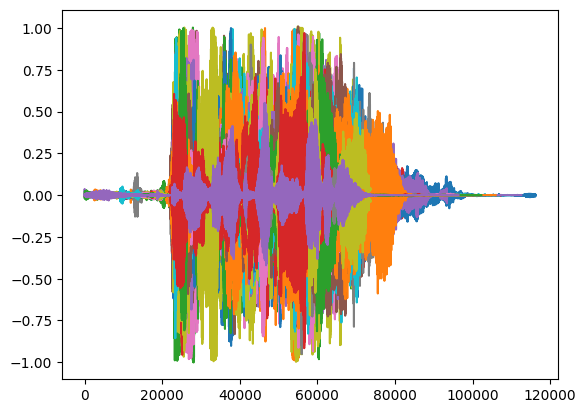

In [5]:
X_train, y_train, X_test, y_test = FeatureExtraction(data_dir)

In [6]:
plt.plot(raw_audio)

NameError: ignored

In [ ]:
print(np.shape(X_train))
print(np.shape(y_test))


## SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

y_predicted= clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)

print(accuracy)

## ConvNet

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv1D, Embedding, Dropout, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam
from keras import Model
from keras.callbacks import EarlyStopping

In [ ]:
## preprocessing for Conv Net

def extract_data(dir):
    """
    This method extracts wav data from each file 
    and returns a train test split of the data
    """
    audio_files = [f for f in os.listdir(dir) if f.endswith(".wav")]
    train_files, test_files = train_test_split(audio_files, test_size=0.2)

    train_data = []
    train_label= []

    test_data = []
    test_label = []
    
    
    for file_name in audio_files:

        # Load audio
        file_path = os.path.join(dir, file_name)
        raw_audio, sr = librosa.load(file_path)

        # if audio is too short, append zeros after it. 
        if np.shape(raw_audio)[0] < 80000: 
            padded_audio = np.pad(raw_audio, [(0, 80000 - np.shape(raw_audio)[0])], mode='constant')
        else:
            padded_audio = raw_audio
        
        # now slice so that we guarantee that each array has the same length
        audio = padded_audio[20000:80000]
        # print('padded_audio.shape:', audio.shape)
        # feature extraction

        mfccs = librosa.feature.mfcc(y=audio, sr = 22050, n_mfcc=100)
        print("mfccs.shape:", mfccs.shape)
        #chroma_stft = librosa.feature.chroma_stft(y = audio, sr=22050)
        # mel_spec = librosa.feature.melspectrogram(y = audio, sr = 22050/4)

        # print("mel_spec.shape:", mel_spec.shape)

        # chroma_cqt = librosa.feature.spectral_centroid(y=a)
        # Concatenate
        # features = np.concatenate([mel_spec.flatten()])
        
        label_map = {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}
        label = file_name.split(".")[0] #this removes the .wav
        label = re.sub('[^a-z]', "", label)
        # print("label:", label)

        if file_name in train_files:
            train_data.append(mfccs)
            train_label.append(label_map[label])

        elif file_name in test_files: 
            test_data.append(mfccs)
            test_label.append(label_map[label])
        plt.plot(raw_audio)
    
    

    label_convert = lambda x: label_map[x]
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    test_data = np.array(test_data)
    test_label = np.array(test_label)

  
    return train_data, train_label, test_data, test_label



In [ ]:
from keras.utils.np_utils import to_categorical
X_train, y_train, X_test, y_test = extract_data(data_dir)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2022)



In [ ]:
#OHE labels
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_val_ohe = to_categorical(y_val)

In [ ]:
print(X_train.shape)

## Define ConvNet Architecture

In [ ]:
input_shape = (X_train[0].shape[0], 1) 
int_sequence = keras.Input(shape=input_shape, dtype='float32')
x = Conv1D(64, 8, activation='relu')(int_sequence)
x = MaxPooling1D(8)(x)
x = Conv1D(128, 8, activation='relu')(x)
x = MaxPooling1D(8)(x)
x = Conv1D(256, 8, activation='relu')(x)
x = MaxPooling1D(8)(x)
x = Conv1D(512, 8, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(8, activation='softmax')(x)
convnet_model = Model(inputs=int_sequence, outputs=preds)

convnet_model.summary()


## 2D Convolution on Spectrogram

In [ ]:
import tensorflow as tf
num_classes = 8
def build_cnn(input_shape, num_classes):
    model = tf.keras.Sequential()
    
    # Convolutional layers
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='valid', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='valid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='valid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.MaxPooling2D())

    # Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(num_classes))
    model.add(tf.keras.layers.Activation('softmax'))
    
    return model


#num frames is number of wav files
model = build_cnn((X_train.shape[1], X_train.shape[2], 1), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_ohe, batch_size=32, epochs=15, validation_data=(X_val, y_val_ohe))

## Define Training Arguments

In [ ]:
#epochs, batch size 
batchsize = 32
epochs = 50
#optimizer
adam = Adam(learning_rate=10e-7)

#early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   restore_best_weights=True,
                   patience=10,
                   verbose=1)

#compile model
convnet_model.compile(optimizer=adam,
              loss='categorical_crossentropy', #I don't feel like using OHE
              metrics=['accuracy'])
 

#train model
convnet_model.fit(X_train, y_train_ohe, batch_size=batchsize, epochs=epochs, validation_data=(X_val, y_val_ohe))


## Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 225 points : 157


In [ ]:
# this cell is to export a .csv file to submit (filename & predicted label) 

import csv

with open('prediction.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'label'])
    for i in range(len(y_filename)):
      writer.writerow([y_filename[i], y_predicted[i]])
file.close()

